# cây hồi quy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
import pydotplus
plt.style.use('seaborn-v0_8-white')

In [3]:
# This function creates images of tree models using pydot

def print_tree(estimator, features, class_names=None):
    dot_data = StringIO()
    export_graphviz(
        estimator,
        out_file=dot_data,
        feature_names=features,
        class_names=class_names,  # chỉ dùng nếu bạn truyền vào
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph


In [4]:
df = pd.read_csv('Downloads/Data/Hitters.csv').dropna()
dummies = pd.get_dummies(df[['League', 'Division',
                             'NewLeague']])
df = pd.concat([df, dummies], axis=1)
y = df.Salary
X = df[['Years', 'Hits']]


In [5]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

In [6]:
DecisionTreeRegressor(max_leaf_nodes=3)

DecisionTreeRegressor(max_leaf_nodes=3)

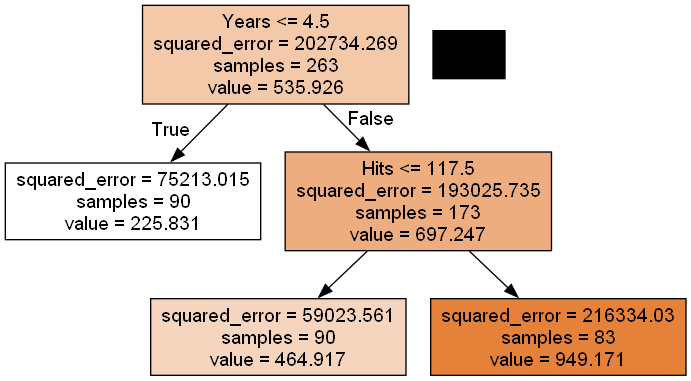

In [7]:
graph = print_tree(regr, features=['Years', 'Hits'])  
Image(graph.create_png())

Text(11, 170, 'R3')

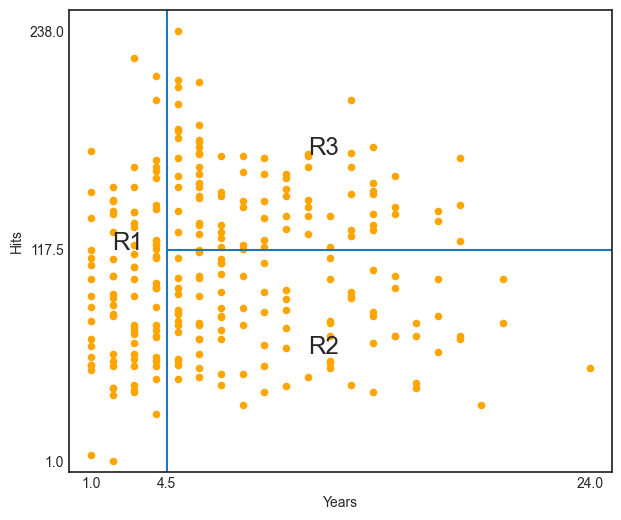

In [8]:
df.plot('Years', 'Hits', kind='scatter', color='orange',
        figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')


In [9]:
regr.score(X,y)

0.43665573627391885

In [10]:
boston_df = pd.read_csv('Downloads/Data/Boston.csv')

In [11]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, random_state=0)

In [12]:

regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)


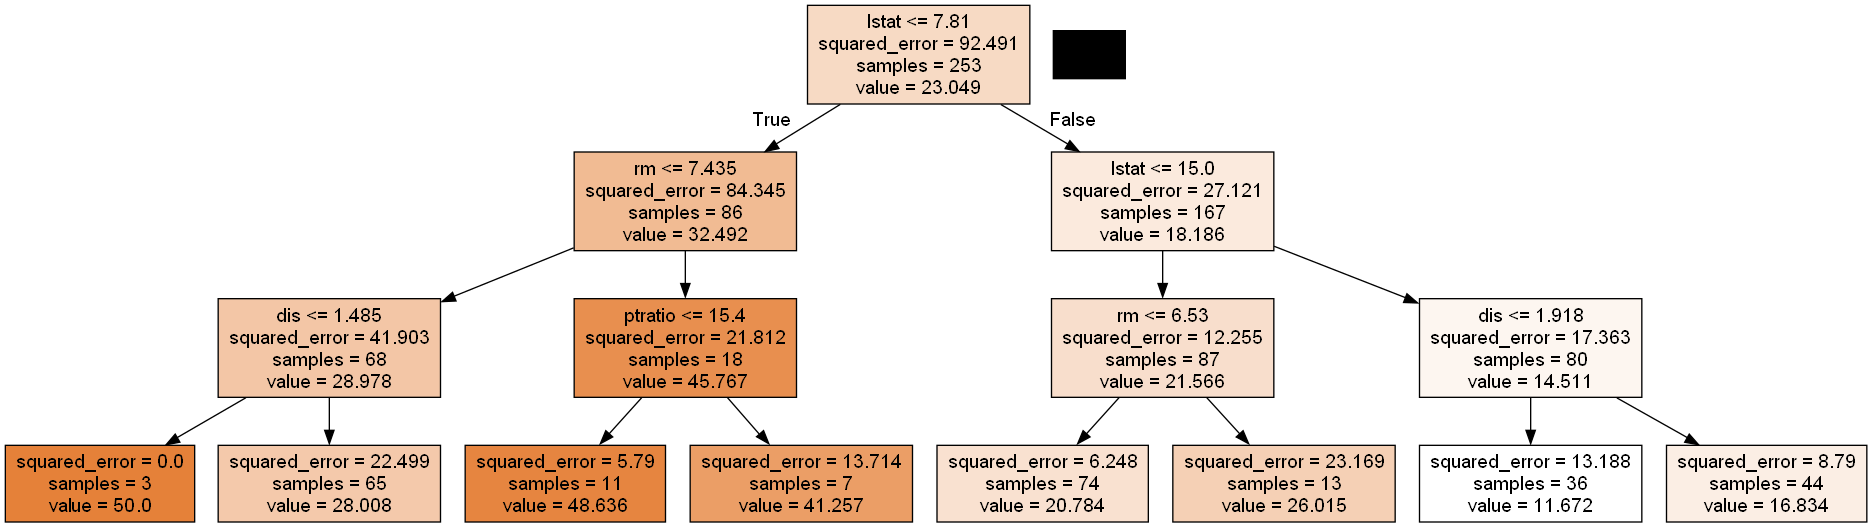

In [13]:
graph = print_tree(regr2, features=X.columns)
Image(graph.create_png())


In [14]:
regr2.score(X_train,y_train)

0.8612338526838175

In [15]:
regr2.score(X_test,y_test)

0.6567545227706459

# cây phân loại

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [17]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()

    export_graphviz(estimator, out_file=dot_data,
                    feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return graph

In [18]:
df2 = pd.read_csv('Downloads/Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [19]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No


In [20]:
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [21]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2, y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [22]:
 DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [23]:
clf.score(X2, y2)

0.7575757575757576

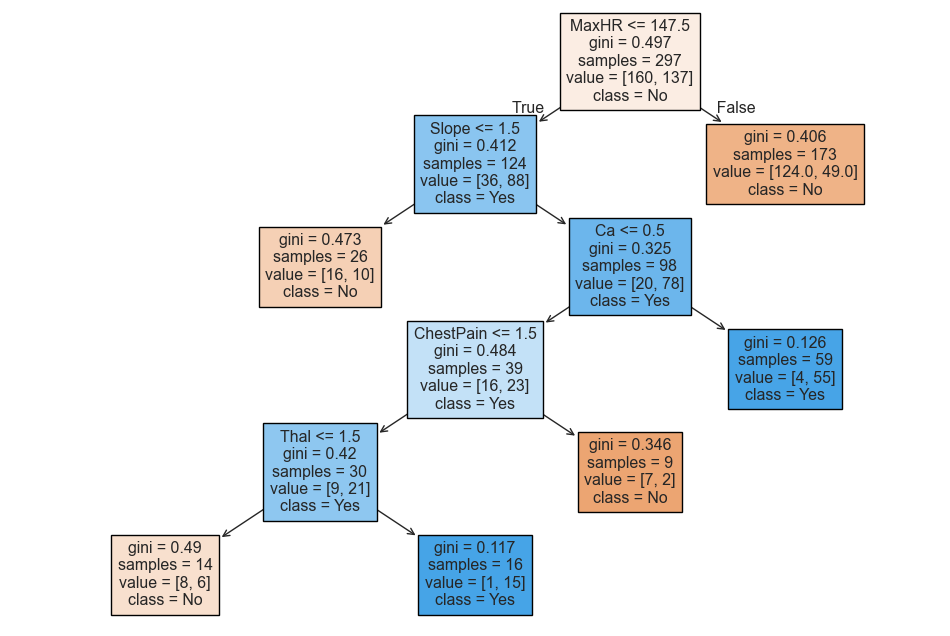

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, 
          feature_names=X2.columns, 
          class_names=['No','Yes'], 
          filled=True)
plt.show()


In [25]:
df3 = pd.read_csv('Downloads/Data/Carseats.csv').drop('Unnamed: 0', axis=1)
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
df3['High'] = df3.Sales.map(lambda x: 1 if x > 8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})

In [27]:
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [28]:
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                         test_size=0.5, random_state=0)

In [29]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [30]:
DecisionTreeClassifier(max_depth=4)


DecisionTreeClassifier(max_depth=4)

In [31]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       236
           1       0.89      0.56      0.69       164

    accuracy                           0.79       400
   macro avg       0.83      0.76      0.77       400
weighted avg       0.81      0.79      0.78       400



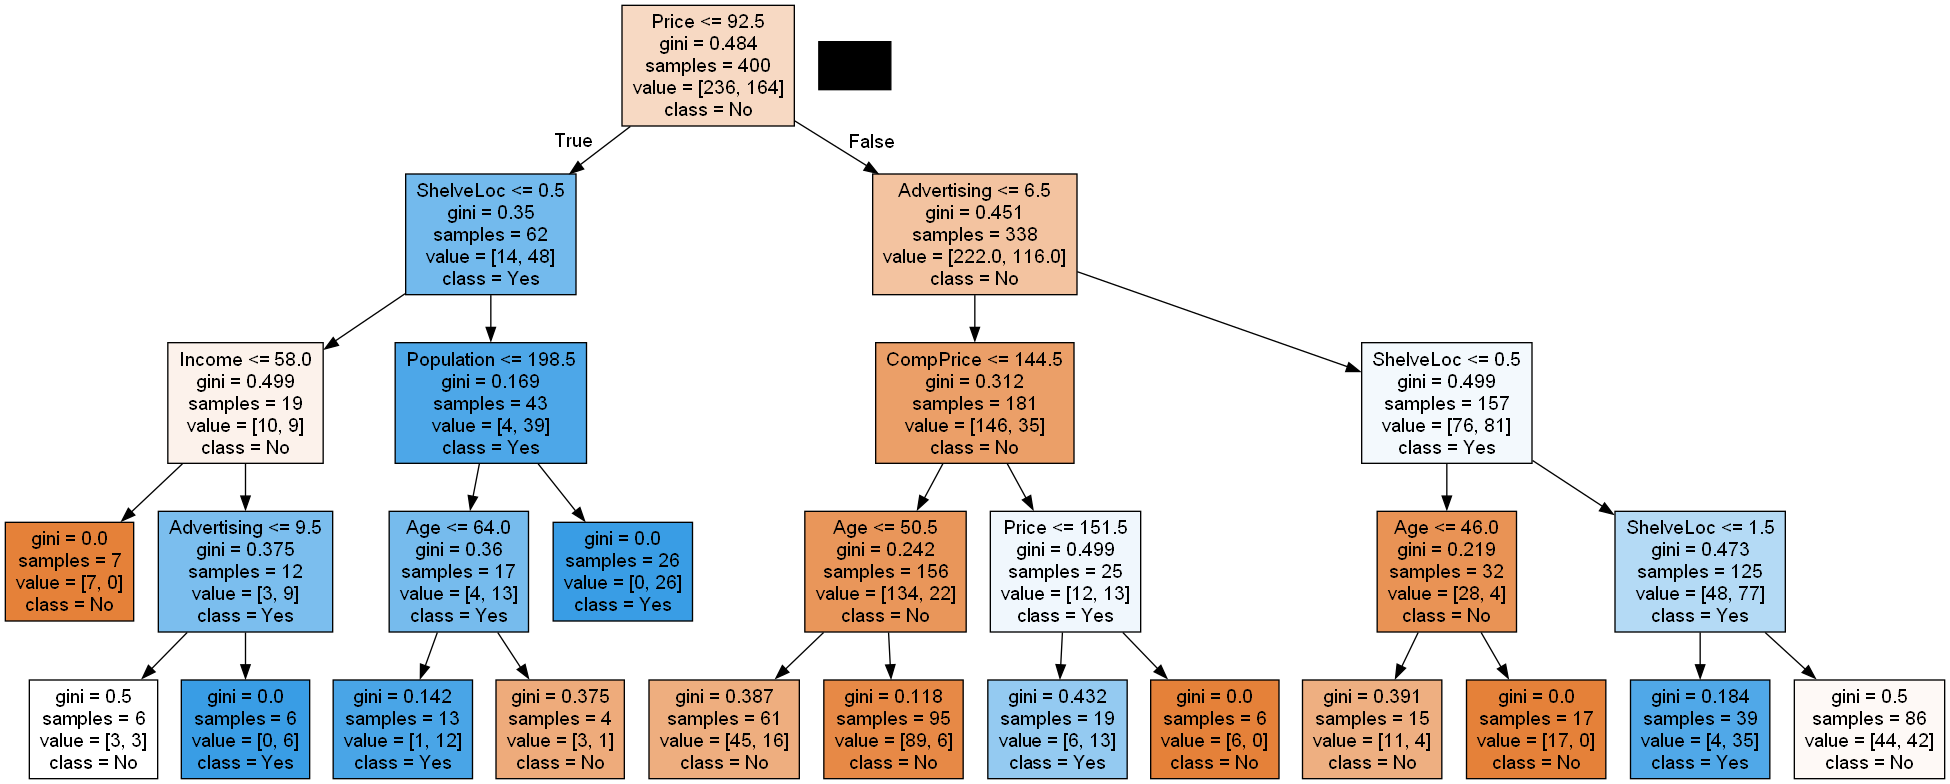

In [35]:
import pydotplus as pydot
graph3 = print_tree(clf, features=X.columns, class_names=['No', 'Yes'])
Image(graph3.create_png())

In [36]:

y_pred = clf.predict(X)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y, y_pred)

# Đưa vào DataFrame để hiển thị đẹp hơn
cm_df = pd.DataFrame(cm,
                     index=['No', 'Yes'],      # Nhãn thực tế
                     columns=['No', 'Yes'])    # Nhãn dự đoán

print(cm_df)


      No  Yes
No   225   11
Yes   72   92


# SVM OVO

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, \
                                    GridSearchCV

from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import \
                                    LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, \
                            classification_report

%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [38]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Set1)
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Text(0, 0.5, 'X2')

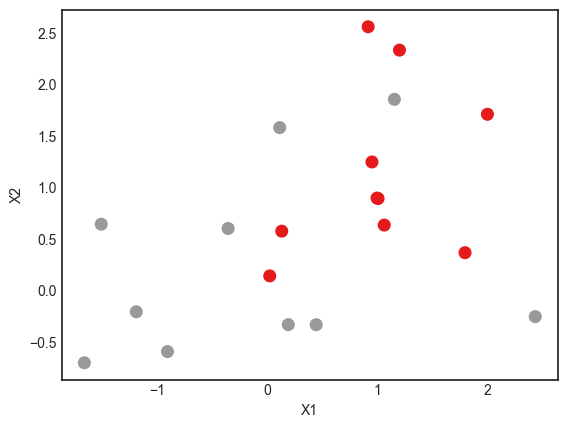

In [39]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] + 1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Set1)
plt.xlabel('X1')
plt.ylabel('X2')

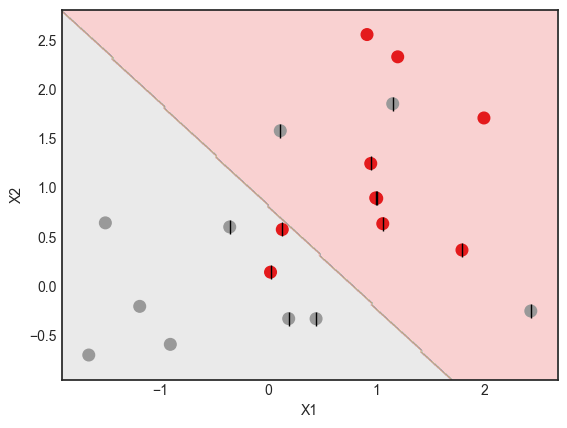

In [40]:
svc = SVC(C=1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

In [41]:
w=svc.coef_[0]
print(w)

[-0.73273926 -0.70326681]


In [42]:
b=svc.intercept_[0]
print(b)

0.5729441305210916


Text(0, 0.5, 'X2')

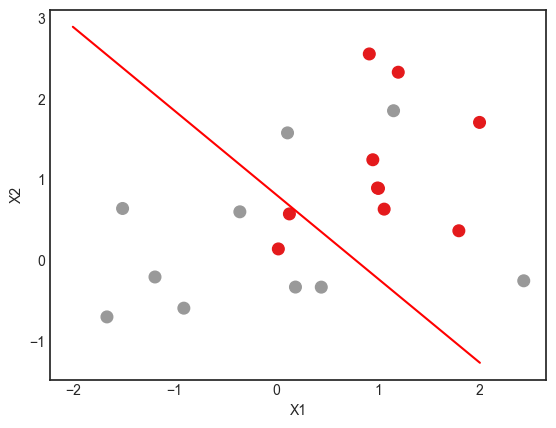

In [43]:
# w1x1 + w2x2 + b = 0
xx = np.linspace(-2, 2, 50)
yy = -(w[0] * xx + b) / w[1]
plt.plot(xx, yy, c='red')

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Set1)
plt.xlabel('X1')
plt.ylabel('X2')


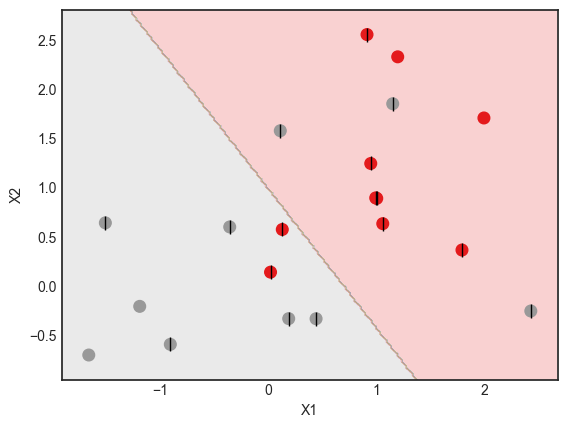

In [44]:

svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)


In [45]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters,
                   cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
#clf.cv_results_


GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             return_train_score=True, scoring='accuracy')

In [46]:
GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             return_train_score=True, scoring='accuracy')


GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             return_train_score=True, scoring='accuracy')

In [47]:
# 0.001 is best according to GridSearchCV.
clf.best_params_


{'C': 0.001}

Text(0, 0.5, 'X2')

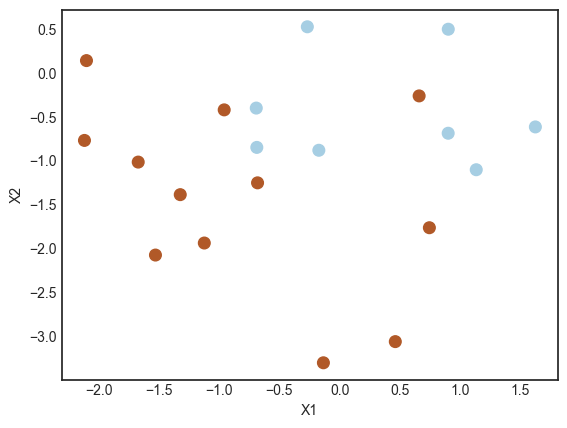

In [48]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] - 1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [49]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc.classes_)


,-1,1
-1,2,6
1,0,12


In [50]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)
y_pred = svc3.predict(X_test)


In [51]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)


,-1,1
-1,2,6
1,0,12


Text(0, 0.5, 'X2')

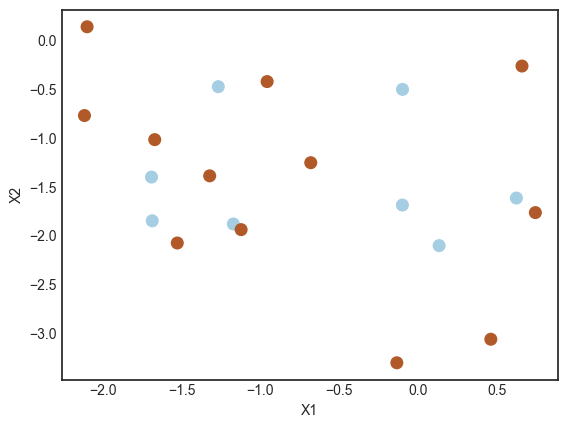

In [52]:

X_test[y_test == -1] = X_test[y_test == -1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')


In [76]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)


SVC(C=10.0, kernel='linear')

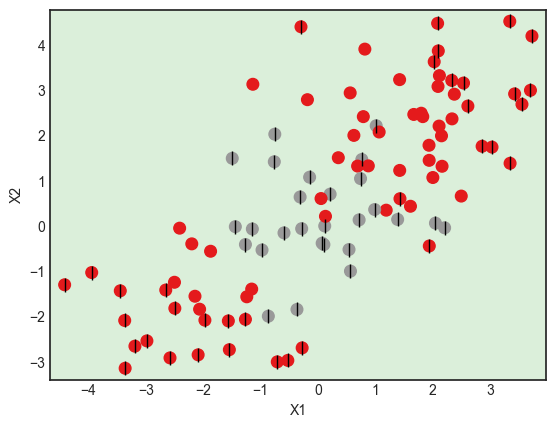

In [77]:
plot_svc(svc4, X_test, y_test)

In [82]:
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, kernel='linear')

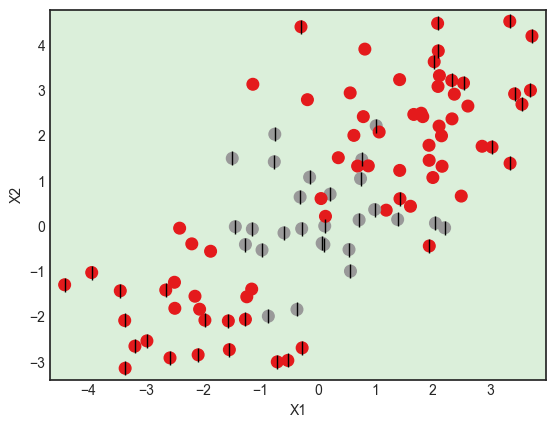

In [84]:
plot_svc(svc5, X_test, y_test)

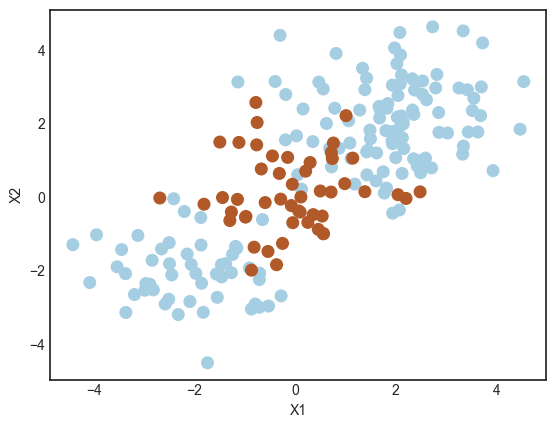

In [58]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[100:150] = X[100:150] - 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');


In [59]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(gamma=1)

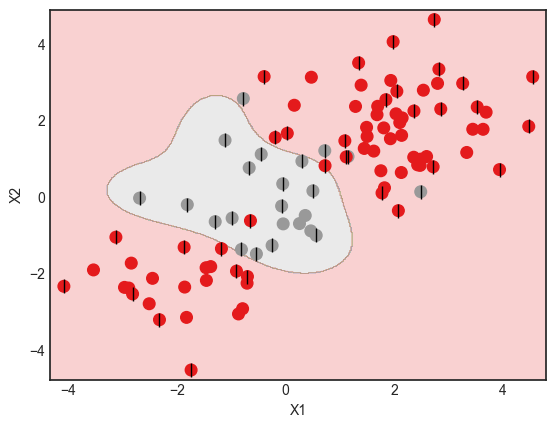

In [60]:
plot_svc(svm, X_train, y_train)

In [61]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

SVC(C=100, gamma=1.0)

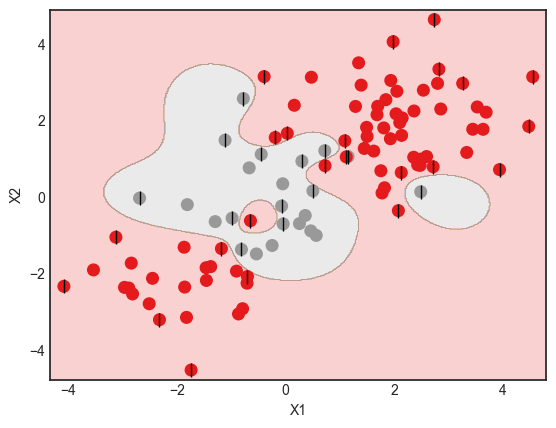

In [62]:
plot_svc(svm2, X_train, y_train)


In [63]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1, 2, 3, 4]}]

clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10,
                   scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.5, 1, 2, 3, 4]}],
             return_train_score=True, scoring='accuracy')

In [64]:
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [65]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[67,  6],
       [ 6, 21]])

In [66]:
clf.best_estimator_.score(X_test, y_test)

0.88

In [67]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=2)

In [68]:
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

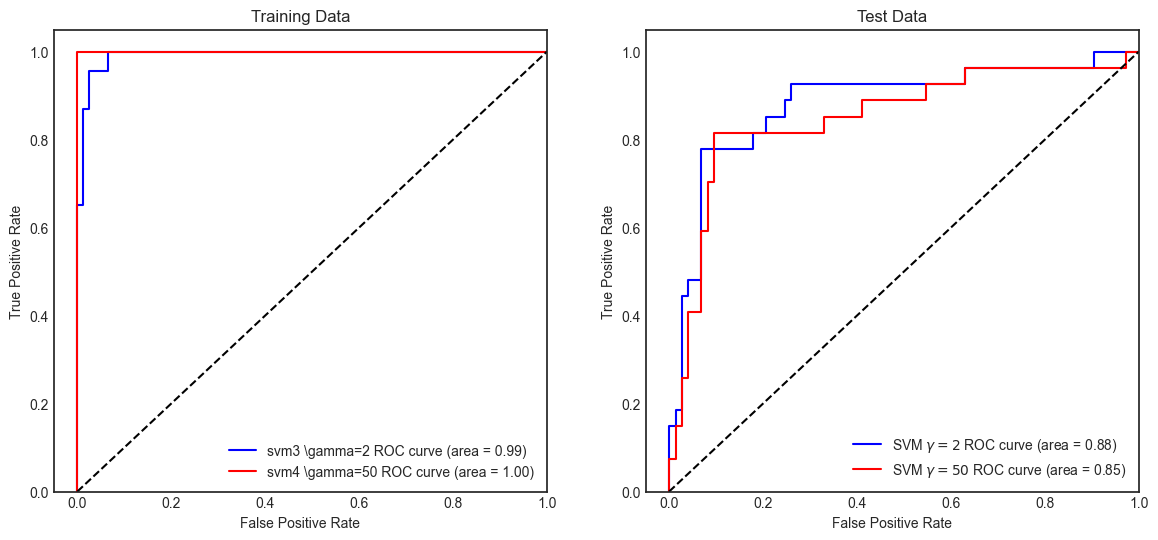

In [69]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3,
         label='svm3 \\gamma=2 ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4,
         label='svm4 \\gamma=50 ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3,
         label='SVM $\gamma=2$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4,
         label='SVM $\gamma=50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")



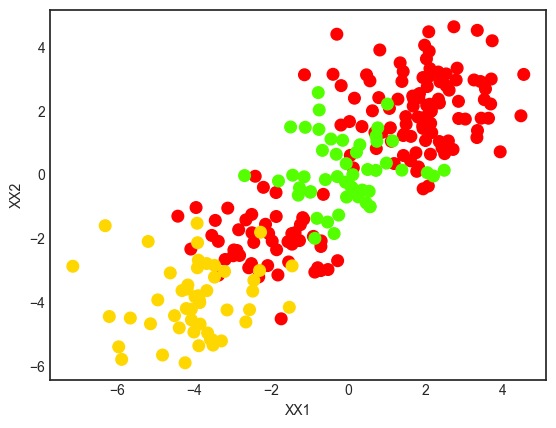

In [72]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50, 2)])
YY = np.hstack([y, np.repeat(0, 50)])

# Dịch chuyển các điểm có nhãn 0
XX[YY == 0] = XX[YY == 0] - 4

plt.scatter(XX[:,0], XX[:,1], s=70, c=YY, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')
plt.show()

In [74]:
svm5 = SVC(C=1, kernel='rbf')
#svm5 = SVC(C=1, kernel='linear')
svm5.fit(XX, YY)


SVC(C=1)

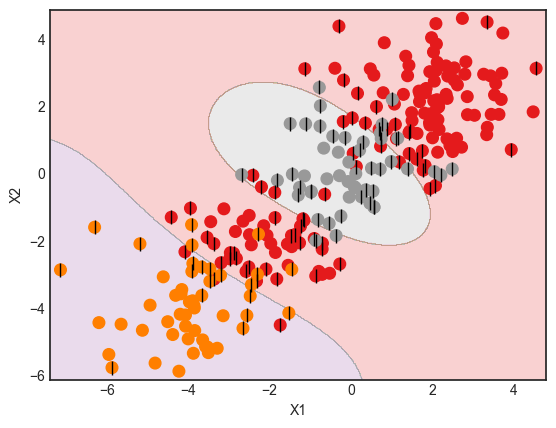

In [75]:
plot_svc(svm5, XX, YY)


# Phương trình siêu phẳng

In [85]:
# w và b đã được lấy từ mô hình SVM tuyến tính
w = svc.coef_[0]
b = svc.intercept_[0]

# In phương trình siêu phẳng
terms = [f"{w[i]:.3f}·x{i+1}" for i in range(len(w))]
equation = " + ".join(terms) + f" + ({b:.3f}) = 0"

print("Phương trình siêu phẳng:")
print(f"    {equation}")


Phương trình siêu phẳng:
    -0.733·x1 + -0.703·x2 + (0.573) = 0


In [86]:
norm_w = np.linalg.norm(w)
margin = 2 / norm_w
print("Chuẩn của w:", norm_w)
print("Lề (margin):", margin)


Chuẩn của w: 1.0156234641890804
Lề (margin): 1.9692337470726813


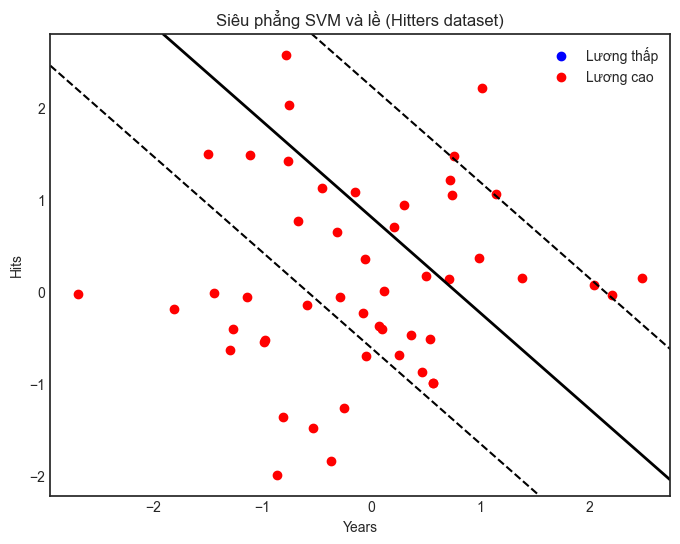

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Lương thấp')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Lương cao')

# Tạo lưới để vẽ đường
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 200)
yy = np.linspace(ylim[0], ylim[1], 200)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# Vẽ siêu phẳng và 2 đường biên
ax.contour(XX, YY, Z, colors='k', levels=[0], linewidths=2)      # siêu phẳng
ax.contour(XX, YY, Z, colors='k', levels=[-1, 1], linestyles=['--', '--'])  # biên

plt.xlabel("Years")
plt.ylabel("Hits")
plt.title("Siêu phẳng SVM và lề (Hitters dataset)")
plt.legend()
plt.show()
